<a href="https://colab.research.google.com/github/m-agnet/Bachelor-of-Physics/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#データを横軸: 時間, 縦軸: 物理量で描画

In [ ]:
# ライブラリのインポート
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
# ファイルを読み込む
path = '/content/drive/MyDrive/Colab Notebooks/data_analysis/entropy0.txt'
# path = '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/press_box343.txt'
data = pd.read_table(path, sep='\s+')

# データ解析する物理量
# quantity_name = 'Press'
quantity_name = 'TotEng'

# LAMMPS設定の入力
thermo = 100
t_step = 0.005
skip = t_step * thermo # 1行ごとにskipだけtimeを進めるデータを使っている


# データを出力する
print(data)


          Step    Time      Temp    TotEng     Press
0            0     0.0  1.000000  0.401105 -0.329799
1          100     0.5  1.381263  0.338556  0.291367
2          200     1.0  1.347597  0.198765  0.215974
3          300     1.5  1.279826  0.037041  0.214856
4          400     2.0  1.197260 -0.116242  0.196625
...        ...     ...       ...       ...       ...
9996    999600  4998.0  0.992372 -1.367131  0.042690
9997    999700  4998.5  0.997397 -1.355571  0.063114
9998    999800  4999.0  1.003290 -1.348665  0.039733
9999    999900  4999.5  1.000845 -1.341931  0.076120
10000  1000000  5000.0  0.990251 -1.333634  0.043692

[10001 rows x 5 columns]


In [ ]:
# # データを短くしたいときには実行する
# sidx=1000 + 1
# eidx=10000 + 1
# data = data.drop(range(sidx,eidx))
# print(data)

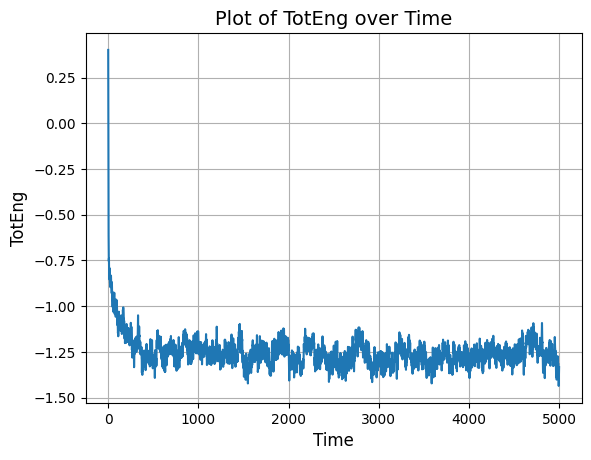

In [ ]:
# データを格納する
x = data['Time']  # 時間
y = data[quantity_name]  # 物理量

# データをプロットする
plt.plot(x, y)
plt.xlabel('Time', fontsize=12)
plt.ylabel(quantity_name, fontsize=12)
plt.title(f'Plot of {quantity_name} over Time', fontsize=14)
plt.grid()

plt.show()


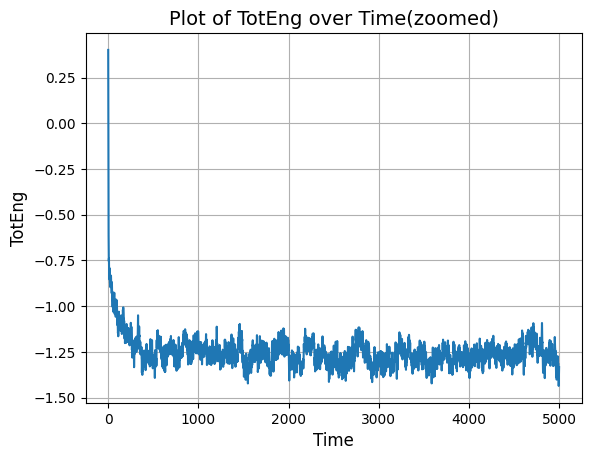

In [ ]:
# ズーム
zoom = m.ceil(10000//skip)
x_zoomed = x[:zoom]  # 横軸の範囲を制限
y_zoomed = y[:zoom]  # 対応するy_logの範囲も制限

plt.plot(x_zoomed, y_zoomed)
plt.xlabel('Time', fontsize=12)
plt.ylabel(quantity_name, fontsize=12)
plt.title(f'Plot of {quantity_name} over Time(zoomed)', fontsize=14)
plt.grid()
plt.show()


## 初期値を捨てる

          Step    Time      Temp    TotEng     Press
10        1000     5.0  0.994437 -0.663621  0.091107
11        1100     5.5  0.978691 -0.706142  0.053089
12        1200     6.0  0.984578 -0.734880  0.058971
13        1300     6.5  0.988599 -0.750073  0.039689
14        1400     7.0  0.980737 -0.754022  0.024451
...        ...     ...       ...       ...       ...
9996    999600  4998.0  0.992372 -1.367131  0.042690
9997    999700  4998.5  0.997397 -1.355571  0.063114
9998    999800  4999.0  1.003290 -1.348665  0.039733
9999    999900  4999.5  1.000845 -1.341931  0.076120
10000  1000000  5000.0  0.990251 -1.333634  0.043692

[9991 rows x 5 columns]


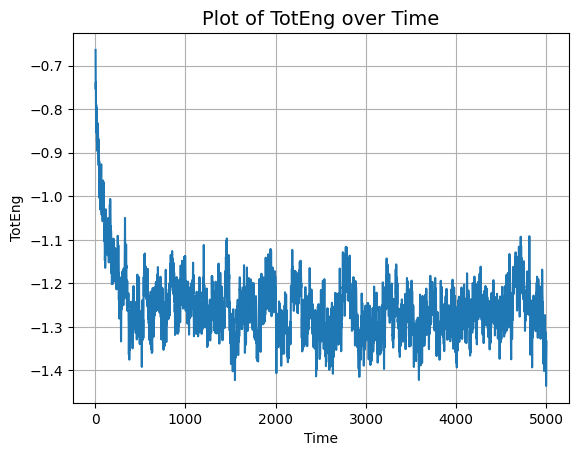

In [ ]:
# データ加工
start = 0
end = 9 # ズームされたグラフから目視で明らかに初期値のデータを捨てる
data = data.drop(range(start,end+1))
print(data)

# データを再格納する
x = data['Time']  # 時間
y = data[quantity_name]  # 物理量

# データをプロットする
plt.plot(x, y)
plt.xlabel('Time')
plt.ylabel(quantity_name)
plt.title('Plot of ' + quantity_name + ' over Time', fontsize=14)
plt.grid()

plt.show()

# 緩和時間に関して(thermo>=10000では実行しない)

## log変換(推定平均値使用)

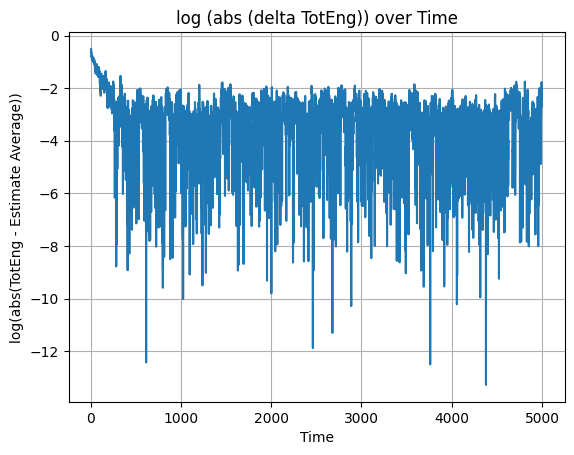

In [ ]:
# log変換

estimate_average = -1.26558 # 推定平均値を入力, データによって調整
# estimate_average = 1939 # 推定平均値を入力, データによって調整

y_log = np.log(np.abs(y - estimate_average))

plt.plot(x, y_log)
plt.xlabel('Time')
plt.ylabel('log(abs(' + quantity_name + ' - Estimate Average))')
plt.title(f'log (abs (delta {quantity_name})) over Time')
plt.grid()
plt.show()


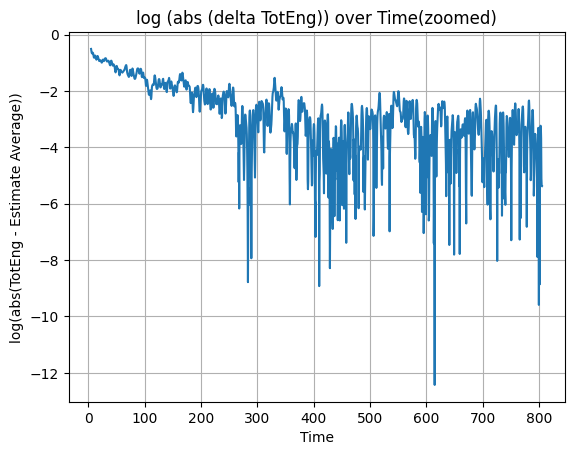

In [ ]:
# ズーム
zoom = m.ceil(801 // skip) # データによって調整
x_zoomed = x[:zoom]  # 横軸の範囲を制限
y_log_zoomed = y_log[:zoom]  # 対応するy_logの範囲も制限

plt.plot(x_zoomed, y_log_zoomed)
plt.xlabel('Time')
plt.ylabel('log(abs(' + quantity_name + ' - Estimate Average))')
plt.title(f'log (abs (delta {quantity_name})) over Time(zoomed)')
plt.grid()
plt.show()


In [ ]:
# # log変換
# estimate_average = 2900 # 推定平均値を入力
# y_log = np.log(np.abs(y - estimate_average))

# fig, ax = plt.subplots()

# ax.plot(x, y_log)
# ax.set_xlabel('Time')
# ax.set_ylabel(f'log(abs( {quantity_name} - Estimate Average))')
# ax.set_title(f'Time Evolution of {quantity_name} after Log Transformation')
# ax.legend()

# # step4 zoomしたグラフの描画
# axins = ax.inset_axes([0.6, 0.6, 0.37, 0.37])
# axins.plot(x, y_log)
# # zoomしたグラフの設定
# x1, x2, y1, y2 = 0, 1000, -4, 5
# axins.set_xlim(x1, x2)
# axins.set_ylim(y1, y2)
# ax.indicate_inset_zoom(axins)

# plt.grid()
# plt.show()


## 線形近似によって緩和時間の測定

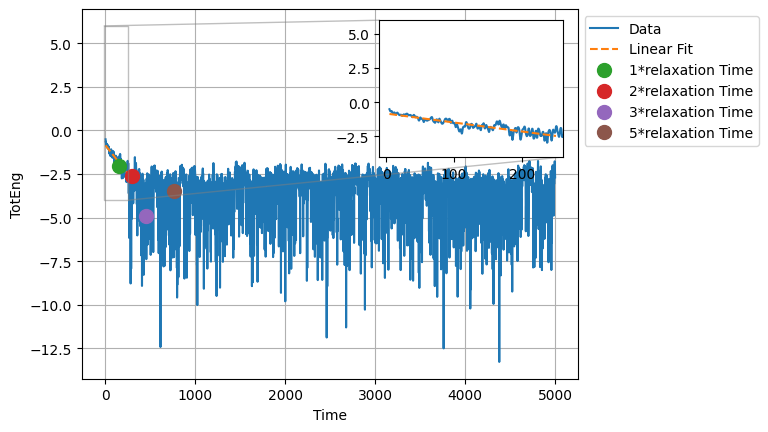

1倍緩和時間 = 152.19636400361514
2倍緩和時間 = 304.3927280072303
3倍緩和時間 = 456.58909201084543
5倍緩和時間 = 760.9818200180757


In [ ]:
tau = 0.0
if thermo < 10000:

    # 指定のx軸の範囲にあるデータだけを使ってフィットする
    # グラフの見た目から直線近似できそうなデータ群を選択

    xmin = 0  # 最小のx軸の値
    xmax = 250  # 最大のx軸の値, データによって調整

    mask = (x >= xmin) & (x <= xmax)
    p = np.polyfit(x[mask], y_log[mask], 1)
    y_fit = np.polyval(p, x[mask])

    # フィット直線の傾きから緩和時間を計算する
    tau = -1/p[0]
    times = [1, 2, 3, 5]
    y_vals = [np.interp(tau * t, x, y_log) for t in times]

    # プロット
    fig, ax = plt.subplots()
    ax.plot(x, y_log, label='Data')
    ax.plot(x[mask], y_fit, '--', label='Linear Fit')
    for t, y in zip(times, y_vals):
        ax.plot(tau*t, y, 'o', markersize=10, label=f'{t}*relaxation Time')
    ax.set_xlabel('Time')
    ax.set_ylabel(quantity_name)
    ax.legend(bbox_to_anchor=(1, 1))


    # zoomしたグラフの描画
    axins = ax.inset_axes([0.6, 0.6, 0.37, 0.37])
    axins.plot(x, y_log)
    axins.plot(x[mask], y_fit, '--')
    # zoomしたグラフの設定
    x1, x2, y1, y2 = xmin-10, xmax+10, -4, 6
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)
    ax.indicate_inset_zoom(axins)

    plt.grid()
    plt.show()

    # 結果の出力
    for t, y in zip(times, y_vals):
        print(f'{t}倍緩和時間 =', t*tau)


## 5倍緩和時間以前を捨てる データ加工

          Step    Time      Temp    TotEng     Press
1522    152200   761.0  0.990068 -1.295762  0.093245
1523    152300   761.5  0.993587 -1.296370  0.055124
1524    152400   762.0  1.001123 -1.297087  0.067321
1525    152500   762.5  1.000379 -1.297654  0.072948
1526    152600   763.0  1.000953 -1.306088  0.064694
...        ...     ...       ...       ...       ...
9996    999600  4998.0  0.992372 -1.367131  0.042690
9997    999700  4998.5  0.997397 -1.355571  0.063114
9998    999800  4999.0  1.003290 -1.348665  0.039733
9999    999900  4999.5  1.000845 -1.341931  0.076120
10000  1000000  5000.0  0.990251 -1.333634  0.043692

[8479 rows x 5 columns]


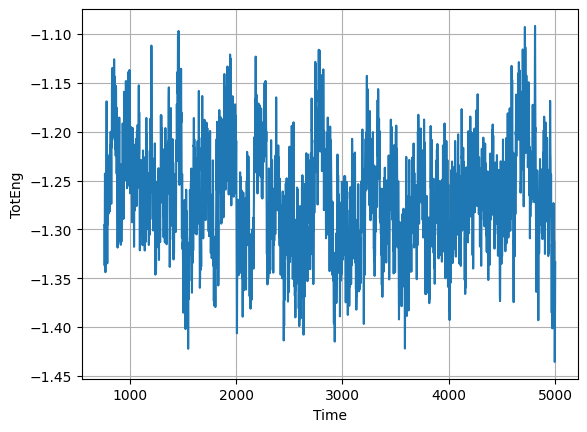

In [ ]:
if thermo < 10000:

    # 再度ファイルを読み込む
    data = pd.read_table(path, sep='\s+')



    # データ加工
    t=5 # t倍の緩和時間を使用
    trimm = t*tau // skip # 切り捨てるデータの最終行を決定

    start = 0
    end = m.ceil(trimm)
    data = data.drop(range(start,end+1))

    # データの出力
    print(data)

    # データを再格納する
    x = data['Time']  # 時間
    y = data[quantity_name]  # 物理量

    # データをプロットする
    plt.plot(x, y)
    plt.xlabel('Time')
    plt.ylabel(quantity_name)
    plt.grid()
    plt.show()


# 物理量の確率密度分布

Mean: -1.26602
Median: -1.26735
Standard deviation: 0.05315
Minimum value: -1.43574
Maximum value: -1.09174
Interquartile range: 0.07263


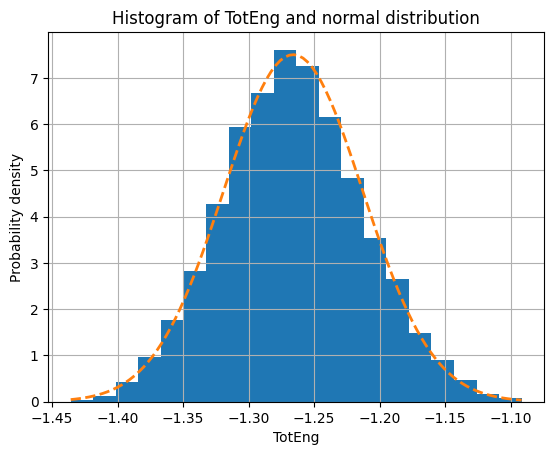

In [ ]:
# データ生成
quantity = data[quantity_name] # t倍の緩和時間以前を捨てた物理量データ

# 統計情報の表示
print(f"Mean: {np.mean(quantity):.5f}")
print(f"Median: {np.median(quantity):.5f}")
print(f"Standard deviation: {np.std(quantity):.5f}")
print(f"Minimum value: {np.min(quantity):.5f}")
print(f"Maximum value: {np.max(quantity):.5f}")
q1, q3 = np.percentile(quantity, [25, 75])
print(f"Interquartile range: {q3 - q1:.5f}")

# ヒストグラムの作成
n, bins, patches = plt.hist(quantity, bins=20, density=True)

# 平均値と標準偏差を求める
mu, sigma = quantity.mean(), quantity.std()

# 正規分布の確率密度関数を作成
x = np.linspace(quantity.min(), quantity.max(), 100)
y = norm.pdf(x, mu, sigma)

# 正規分布の確率密度関数をプロット
plt.plot(x, y, '--', linewidth=2, label='Normal Distribution')


# 軸ラベルの設定
plt.xlabel(quantity_name)
plt.ylabel('Probability density')

# グラフのタイトルの設定
plt.title('Histogram of ' + quantity_name + ' and normal distribution')

# グリッド線の表示
plt.grid()

# グラフを表示
plt.show()


# 大数の法則, 中心極限定理の確認

## ある程度で区切り, それぞれの平均値を用いてヒストグラムを作成

In [ ]:
# データの確認
print(data)

          Step    Time      Temp    TotEng     Press
1522    152200   761.0  0.990068 -1.295762  0.093245
1523    152300   761.5  0.993587 -1.296370  0.055124
1524    152400   762.0  1.001123 -1.297087  0.067321
1525    152500   762.5  1.000379 -1.297654  0.072948
1526    152600   763.0  1.000953 -1.306088  0.064694
...        ...     ...       ...       ...       ...
9996    999600  4998.0  0.992372 -1.367131  0.042690
9997    999700  4998.5  0.997397 -1.355571  0.063114
9998    999800  4999.0  1.003290 -1.348665  0.039733
9999    999900  4999.5  1.000845 -1.341931  0.076120
10000  1000000  5000.0  0.990251 -1.333634  0.043692

[8479 rows x 5 columns]


In [ ]:
# データのシャッフル, thermoが10,000より大きいならばコメントアウト..
if thermo < 10000:
    data = data.sample(frac=1)
    print(data)

        Step    Time      Temp    TotEng     Press
4488  448800  2244.0  1.011072 -1.209548  0.039613
6139  613900  3069.5  1.004689 -1.304145  0.076219
7029  702900  3514.5  1.004369 -1.245983  0.064292
5139  513900  2569.5  1.001831 -1.303708  0.054932
8661  866100  4330.5  0.995017 -1.272145  0.045906
...      ...     ...       ...       ...       ...
3102  310200  1551.0  0.994208 -1.349825  0.072929
2139  213900  1069.5  0.992595 -1.255410  0.019292
5696  569600  2848.0  1.014906 -1.249948  0.059700
3233  323300  1616.5  0.999280 -1.264859  0.039462
7931  793100  3965.5  1.024353 -1.258433  0.082849

[8479 rows x 5 columns]


Statistics for split=1
Mean: -1.26602
Median: -1.26735
Standard deviation: 0.05316
Minimum value: -1.43574
Maximum value: -1.09174
Interquartile range: 0.07263

Statistics for split=4
Mean: -1.26602
Median: -1.26689
Standard deviation: 0.02578
Minimum value: -1.34577
Maximum value: -1.16520
Interquartile range: 0.03397

Statistics for split=16
Mean: -1.26600
Median: -1.26615
Standard deviation: 0.01282
Minimum value: -1.30533
Maximum value: -1.22769
Interquartile range: 0.01829

Statistics for split=64
Mean: -1.26602
Median: -1.26612
Standard deviation: 0.00610
Minimum value: -1.28270
Maximum value: -1.25135
Interquartile range: 0.00733



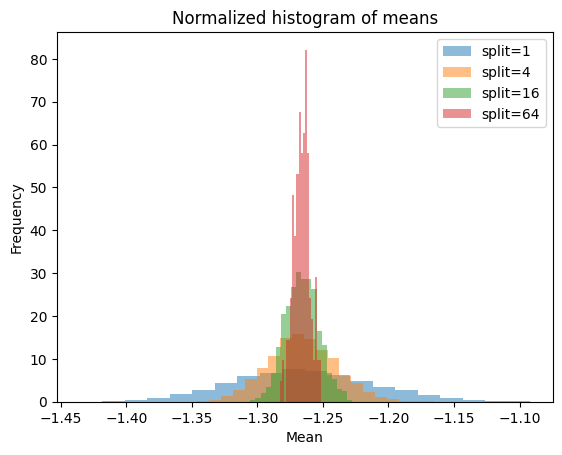

In [ ]:
# データ整理
quantity = data[quantity_name]
num_rows = quantity.shape[0]

# 任意のsplit値のリスト
split_list = [1, 4, 16, 64]

for split in split_list:
    # ヒストグラムの描画
    num_splits = num_rows // split
    means = quantity.iloc[:num_splits*split].to_numpy().reshape(-1, split).mean(axis=1)
    plt.hist(means, bins=20, alpha=0.5, label=f"split={split}", density=True)

    # 統計情報
    mean = np.mean(means)
    median = np.median(means)
    std_dev = np.std(means, ddof=1)
    min_val = np.min(means)
    max_val = np.max(means)
    q1, q3 = np.percentile(means, [25, 75])

    print(f"Statistics for split={split}")
    print(f"Mean: {mean:.5f}")
    print(f"Median: {median:.5f}")
    print(f"Standard deviation: {std_dev:.5f}")
    print(f"Minimum value: {min_val:.5f}")
    print(f"Maximum value: {max_val:.5f}")
    print(f"Interquartile range: {q3-q1:.5f}")
    print()

# ヒストグラムの装飾
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.title('Normalized histogram of means')
plt.legend()

plt.show()


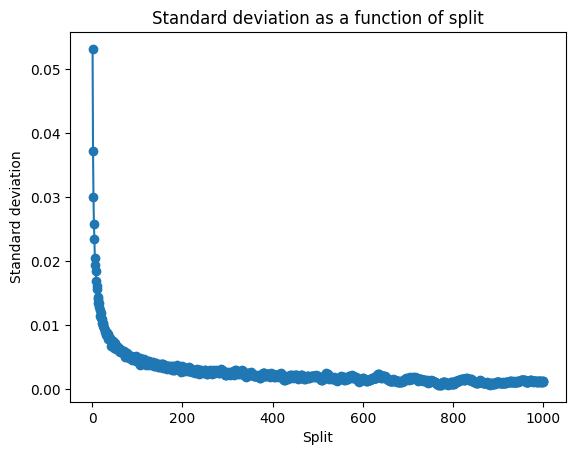

In [ ]:
# splitによる標準偏差の推移
std_dev_list = []

start = 1
end = 1000 # データによって調整

for split in range(start, end+1):
    # データをsplit数に分割し、各グループの平均値を計算
    num_splits = num_rows // split
    means = quantity.iloc[:num_splits*split].to_numpy().reshape(-1, split).mean(axis=1)

    # 平均値の標準偏差を計算し、リストに追加
    std_dev = np.std(means, ddof=1)
    std_dev_list.append(std_dev)

# 横軸にsplit数、縦軸に標準偏差を取るプロットを作成
plt.plot(range(start, end+1), std_dev_list, 'o-')
plt.xlabel('Split')
plt.ylabel('Standard deviation')
plt.title('Standard deviation as a function of split')

plt.show()


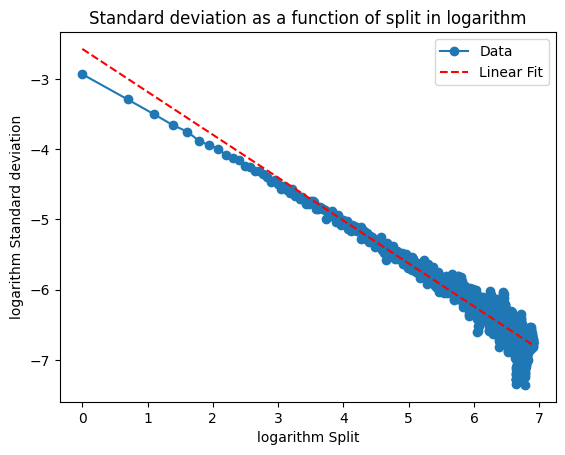

gradient=-0.6105164696132898


In [ ]:
# 対数変換
x = np.log(range(start, end+1))
y = np.log(std_dev_list)
fit = np.polyfit(x, y, deg=1)  # 1次の多項式による線形フィット

# プロット
plt.plot(x, y, 'o-')
plt.plot(x, fit[0] * x + fit[1], color='red', linestyle='--')  # 線形フィットのプロット
plt.xlabel('logarithm Split')
plt.ylabel('logarithm Standard deviation')
plt.title('Standard deviation as a function of split in logarithm')
plt.legend(['Data', 'Linear Fit'])
plt.show()
print(f"gradient={fit[0]}")


In [ ]:
# quantityの順番を元に戻す

if thermo < 10000:
    print(quantity)
    print() # 1行開ける
    data=data.sort_index()
    quantity=data[quantity_name]
    print(quantity)

4488   -1.209548
6139   -1.304145
7029   -1.245983
5139   -1.303708
8661   -1.272145
          ...   
3102   -1.349825
2139   -1.255410
5696   -1.249948
3233   -1.264859
7931   -1.258433
Name: TotEng, Length: 8479, dtype: float64

1522    -1.295762
1523    -1.296370
1524    -1.297087
1525    -1.297654
1526    -1.306088
           ...   
9996    -1.367131
9997    -1.355571
9998    -1.348665
9999    -1.341931
10000   -1.333634
Name: TotEng, Length: 8479, dtype: float64
